In [34]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
#'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'd61a2c97-f6b5-46bf-9993-fd76013e081c',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-03-22T15:09:07.411Z', 'error_code': 0, 'error_message': None, 'elapsed': 36, 'credit_count': 1, 'notice': None, 'total_count': 9250}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10940, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [35]:
type(data)

dict

In [36]:
import pandas as pd

#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [37]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\Dell\Downloads\New folder\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10940,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.966116e+07,1.966116e+07,False,NaN,1,NaN,NaN,None,2024-03-22T15:08:00.000Z,63096.290340,4.313681e+10,-20.8951,-0.397317,-5.429007,-7.797435,23.725370,55.513147,44.057006,1.240546e+12,51.7276,1.325022e+12,None,2024-03-22T15:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-22 15:09:18.203840
1,1027,Ethereum,ETH,ethereum,8627,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.200735e+08,1.200735e+08,True,NaN,2,NaN,NaN,None,2024-03-22T15:07:00.000Z,3309.636650,2.042904e+10,-30.3776,-1.162896,-5.923450,-10.682731,14.507843,39.849509,44.427478,3.973997e+11,16.5706,3.973997e+11,None,2024-03-22T15:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-22 15:09:18.203840
2,825,Tether USDt,USDT,tether,79941,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.040540e+11,1.077926e+11,True,NaN,3,NaN,NaN,None,2024-03-22T15:07:00.000Z,0.999807,8.503901e+10,-19.5166,-0.002753,-0.066342,-0.006473,-0.007907,0.044191,-0.123701,1.040339e+11,4.3379,1.077718e+11,None,2024-03-22T15:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-22 15:09:18.203840
3,1839,BNB,BNB,bnb,2118,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495375e+08,1.495375e+08,False,NaN,4,NaN,NaN,None,2024-03-22T15:07:00.000Z,547.166948,2.839406e+09,-3.9018,-1.482469,-2.210872,-6.995714,48.117907,76.645329,102.956702,8.182199e+10,3.4118,8.182199e+10,None,2024-03-22T15:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-22 15:09:18.203840
4,5426,Solana,SOL,solana,644,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.440807e+08,5.724437e+08,True,NaN,5,NaN,NaN,None,2024-03-22T15:07:00.000Z,170.105214,4.830413e+09,-33.0366,0.125715,-8.804539,-6.523723,66.863619,95.626258,76.833274,7.554045e+10,3.1498,9.737567e+10,None,2024-03-22T15:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-22 15:09:18.203840
5,52,XRP,XRP,xrp,1276,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.488424e+10,9.998776e+10,False,NaN,6,NaN,NaN,None,2024-03-22T15:08:00.000Z,0.607511,2.774562e+09,4.9323,0.206116,-3.332804,-3.519618,12.829739,15.273010,-1.761298,3.334279e+10,1.3903,6.075112e+10,None,2024-03-22T15:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-22 15:09:18.203840
6,3408,USDC,USDC,usd-coin,17593,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.192358e+10,3.192358e+10,False,NaN,7,NaN,NaN,None,2024-03-22T15:07:00.000Z,0.999918,9.255504e+09,-21.6998,-0.008632,0.001662,-0.024977,-0.017531,-0.025878,-0.057087,3.192096e+10,1.3310,3.192096e+10,None,2024-03-22T15:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-22 15:09:18.203840
7,2010,Cardano,ADA,cardano,1119,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.556949e+10,3.672872e+10,False,NaN,8,NaN,NaN,None,2024-03-22T15:07:00.000Z,0.610581,6.407033e+08,-21.1914,0.601777,-3.516462,-14.977179,4.117749,23.632553,0.725176,2.171805e+10,0.9056,2.747614e+10,None,2024-03-22T15:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-22 15:09:18.203840
8,74,Dogecoin,DOGE,dogecoin,933,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange,

In [38]:
def api_runner():
    global df
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    #'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
}
    headers = {
       'Accepts': 'application/json',
       'X-CMC_PRO_API_KEY': 'd61a2c97-f6b5-46bf-9993-fd76013e081c',
}

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
     print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)

    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df 
    
    if not os.path.isfile(r'C:\Users\Dell\Downloads\Projects_Portfolio\Python_project\API.csv'):
        df.to_csv(r'C:\Users\Dell\Downloads\Projects_Portfolio\Python_project\API.csv',header = 'column_name')
    else:
        df.to_csv(r'C:\Users\Dell\Downloads\Projects_Portfolio\Python_project\API.csv',mode = 'a',header = False)
        

# If that didn't work try using the local host URL as shown in the video

In [39]:
import os
from time import time
from time import sleep

for i in range(100):
    api_runner()
    print('API Ran Successfully')
    sleep(30) #sleep for 1 min
exit

C:\Users\Dell\Downloads\New folder\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\Dell\AppData\Local\Temp\ipykernel_250892\1488600378.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Ran Successfully


C:\Users\Dell\Downloads\New folder\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\Dell\AppData\Local\Temp\ipykernel_250892\1488600378.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Ran Successfully


C:\Users\Dell\Downloads\New folder\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\Dell\AppData\Local\Temp\ipykernel_250892\1488600378.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Ran Successfully


C:\Users\Dell\Downloads\New folder\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\Dell\AppData\Local\Temp\ipykernel_250892\1488600378.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Ran Successfully


KeyboardInterrupt: 

In [40]:
df25 = pd.read_csv(r'C:\Users\Dell\Downloads\Projects_Portfolio\Python_project\API.csv')
df25

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10940,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.966116e+07,1.966116e+07,False,NaN,1,NaN,NaN,NaN,2024-03-22T15:08:00.000Z,63096.290340,4.313681e+10,-20.8951,-0.397317,-5.429007,-7.797435,23.725370,55.513147,44.057006,1.240546e+12,51.7276,1.325022e+12,NaN,2024-03-22T15:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-22 15:09:18.203840
1,1,1027,Ethereum,ETH,ethereum,8627,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.200735e+08,1.200735e+08,True,NaN,2,NaN,NaN,NaN,2024-03-22T15:07:00.000Z,3309.636650,2.042904e+10,-30.3776,-1.162896,-5.923450,-10.682731,14.507843,39.849509,44.427478,3.973997e+11,16.5706,3.973997e+11,NaN,2024-03-22T15:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-22 15:09:18.203840
2,2,825,Tether USDt,USDT,tether,79941,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,1.040540e+11,1.077926e+11,True,NaN,3,NaN,NaN,NaN,2024-03-22T15:07:00.000Z,0.999807,8.503901e+10,-19.5166,-0.002753,-0.066342,-0.006473,-0.007907,0.044191,-0.123701,1.040339e+11,4.3379,1.077718e+11,NaN,2024-03-22T15:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-22 15:09:18.203840
3,3,1839,BNB,BNB,bnb,2118,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.495375e+08,1.495375e+08,False,NaN,4,NaN,NaN,NaN,2024-03-22T15:07:00.000Z,547.166948,2.839406e+09,-3.9018,-1.482469,-2.210872,-6.995714,48.117907,76.645329,102.956702,8.182199e+10,3.4118,8.182199e+10,NaN,2024-03-22T15:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-22 15:09:18.203840
4,4,5426,Solana,SOL,solana,644,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.440807e+08,5.724437e+08,True,NaN,5,NaN,NaN,NaN,2024-03-22T15:07:00.000Z,170.105214,4.830413e+09,-33.0366,0.125715,-8.804539,-6.523723,66.863619,95.626258,76.833274,7.554045e+10,3.1498,9.737567e+10,NaN,2024-03-22T15:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-22 15:09:18.203840
5,5,52,XRP,XRP,xrp,1276,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.488424e+10,9.998776e+10,False,NaN,6,NaN,NaN,NaN,2024-03-22T15:08:00.000Z,0.607511,2.774562e+09,4.9323,0.206116,-3.332804,-3.519618,12.829739,15.273010,-1.761298,3.334279e+10,1.3903,6.075112e+10,NaN,2024-03-22T15:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-22 15:09:18.203840
6,6,3408,USDC,USDC,usd-coin,17593,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.192358e+10,3.192358e+10,False,NaN,7,NaN,NaN,NaN,2024-03-22T15:07:00.000Z,0.999918,9.255504e+09,-21.6998,-0.008632,0.001662,-0.024977,-0.017531,-0.025878,-0.057087,3.192096e+10,1.3310,3.192096e+10,NaN,2024-03-22T15:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-22 15:09:18.203840
7,7,2010,Cardano,ADA,cardano,1119,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.556949e+10,3.672872e+10,False,NaN,8,NaN,NaN,NaN,2024-03-22T15:07:00.000Z,0.610581,6.407033e+08,-21.1914,0.601777,-3.516462,-14.977179,4.117749,23.632553,0.725176,2.171805e+10,0.9056,2.747614e+10,NaN,2024-03-22T15:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-22 15:09:18.203840
8,8,74,Dogecoin,DOGE,dogecoin,933,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 

In [41]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10940,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.966116e+07,1.966116e+07,False,NaN,1,NaN,NaN,None,2024-03-22T15:08:00.000Z,63096.290340,4.313681e+10,-20.8951,-0.397317,-5.429007,-7.797435,23.725370,55.513147,44.057006,1.240546e+12,51.7276,1.325022e+12,None,2024-03-22T15:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-22 15:09:18.203840
1,1027,Ethereum,ETH,ethereum,8627,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.200735e+08,1.200735e+08,True,NaN,2,NaN,NaN,None,2024-03-22T15:07:00.000Z,3309.636650,2.042904e+10,-30.3776,-1.162896,-5.923450,-10.682731,14.507843,39.849509,44.427478,3.973997e+11,16.5706,3.973997e+11,None,2024-03-22T15:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-22 15:09:18.203840
2,825,Tether USDt,USDT,tether,79941,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.040540e+11,1.077926e+11,True,NaN,3,NaN,NaN,None,2024-03-22T15:07:00.000Z,0.999807,8.503901e+10,-19.5166,-0.002753,-0.066342,-0.006473,-0.007907,0.044191,-0.123701,1.040339e+11,4.3379,1.077718e+11,None,2024-03-22T15:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-22 15:09:18.203840
3,1839,BNB,BNB,bnb,2118,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495375e+08,1.495375e+08,False,NaN,4,NaN,NaN,None,2024-03-22T15:07:00.000Z,547.166948,2.839406e+09,-3.9018,-1.482469,-2.210872,-6.995714,48.117907,76.645329,102.956702,8.182199e+10,3.4118,8.182199e+10,None,2024-03-22T15:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-22 15:09:18.203840
4,5426,Solana,SOL,solana,644,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.440807e+08,5.724437e+08,True,NaN,5,NaN,NaN,None,2024-03-22T15:07:00.000Z,170.105214,4.830413e+09,-33.0366,0.125715,-8.804539,-6.523723,66.863619,95.626258,76.833274,7.554045e+10,3.1498,9.737567e+10,None,2024-03-22T15:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-22 15:09:18.203840
5,52,XRP,XRP,xrp,1276,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.488424e+10,9.998776e+10,False,NaN,6,NaN,NaN,None,2024-03-22T15:08:00.000Z,0.607511,2.774562e+09,4.9323,0.206116,-3.332804,-3.519618,12.829739,15.273010,-1.761298,3.334279e+10,1.3903,6.075112e+10,None,2024-03-22T15:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-22 15:09:18.203840
6,3408,USDC,USDC,usd-coin,17593,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.192358e+10,3.192358e+10,False,NaN,7,NaN,NaN,None,2024-03-22T15:07:00.000Z,0.999918,9.255504e+09,-21.6998,-0.008632,0.001662,-0.024977,-0.017531,-0.025878,-0.057087,3.192096e+10,1.3310,3.192096e+10,None,2024-03-22T15:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-22 15:09:18.203840
7,2010,Cardano,ADA,cardano,1119,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.556949e+10,3.672872e+10,False,NaN,8,NaN,NaN,None,2024-03-22T15:07:00.000Z,0.610581,6.407033e+08,-21.1914,0.601777,-3.516462,-14.977179,4.117749,23.632553,0.725176,2.171805e+10,0.9056,2.747614e+10,None,2024-03-22T15:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-22 15:09:18.203840
8,74,Dogecoin,DOGE,dogecoin,933,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange,

In [42]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.206639,-5.179567,-7.616973,23.955104,55.797017,44.228456
Ethereum,-1.124170,-5.933032,-10.645700,14.687952,39.837604,44.386807
Tether USDt,-0.005883,-0.038321,-0.007352,-0.006059,0.046133,-0.102832
BNB,-1.455554,-2.314970,-6.920119,48.189426,76.721120,102.971829
Solana,0.151964,-8.773724,-6.501009,66.963531,95.946019,76.864158
XRP,0.342729,-3.199928,-3.392568,12.982448,15.371521,-1.726116
USDC,-0.003967,-0.012503,-0.017494,-0.007520,-0.019692,-0.038953
Cardano,0.669124,-3.522480,-14.950423,4.173591,23.729623,0.746048
Dogecoin,-0.801186,-4.329742,-9.937409,78.080942,75.923357,58.054481


In [43]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      -0.206639
             quote.USD.percent_change_24h     -5.179567
             quote.USD.percent_change_7d      -7.616973
             quote.USD.percent_change_30d     23.955104
             quote.USD.percent_change_60d     55.797017
             quote.USD.percent_change_90d     44.228456
Ethereum     quote.USD.percent_change_1h      -1.124170
             quote.USD.percent_change_24h     -5.933032
             quote.USD.percent_change_7d     -10.645700
             quote.USD.percent_change_30d     14.687952
             quote.USD.percent_change_60d     39.837604
             quote.USD.percent_change_90d     44.386807
Tether USDt  quote.USD.percent_change_1h      -0.005883
             quote.USD.percent_change_24h     -0.038321
             quote.USD.percent_change_7d      -0.007352
             quote.USD.percent_change_30d     -0.006059
             quote.USD.percent_change_60d      0.046133
      

In [44]:
type(df3)

pandas.core.frame.DataFrame

In [45]:
type(df4)

pandas.core.series.Series

In [46]:
df5 = df4.to_frame(name='values')
df5

values
name                                                
Bitcoin     quote.USD.percent_change_1h    -0.206639
            quote.USD.percent_change_24h   -5.179567
            quote.USD.percent_change_7d    -7.616973
            quote.USD.percent_change_30d   23.955104
            quote.USD.percent_change_60d   55.797017
            quote.USD.percent_change_90d   44.228456
Ethereum    quote.USD.percent_change_1h    -1.124170
            quote.USD.percent_change_24h   -5.933032
            quote.USD.percent_change_7d   -10.645700
            quote.USD.percent_change_30d   14.687952
            quote.USD.percent_change_60d   39.837604
            quote.USD.percent_change_90d   44.386807
Tether USDt quote.USD.percent_change_1h    -0.005883
            quote.USD.percent_change_24h   -0.038321
            quote.USD.percent_change_7d    -0.007352
            quote.USD.percent_change_30d   -0.006059
            quote.USD.percent_change_60d    0.046133
            quote.USD.percent_change_90d   -0.102832
BNB         quote.USD.percent_change_1h    -1.455554
            quote.USD.percent_change_24h   -2.314970
            quote.USD.percent_change_7d    -6.920119
            quote.USD.percent_change_30d   48.189426
            quote.USD.percent_change_60d   76.721120
            quote.USD.percent_change_90d  102.971829
Solana      quote.USD.percent_change_1h     0.151964
            quote.USD.percent_change_24h   -8.773724
            quote.USD.percent_change_7d    -6.501009
            quote.USD.percent_change_30d   66.963531
            quote.USD.percent_change_60d   95.946019
            quote.USD.percent_change_90d   76.864158
XRP         quote.USD.percent_change_1h     0.342729
            quote.USD.percent_change_24h   -3.199928
            quote.USD.percent_change_7d    -3.392568
            quote.USD.percent_change_30d   12.982448
            quote.USD.percent_change_60d   15.371521
            quote.USD.percent_change_90d   -1.726116
USDC        quote.USD.percent_change_1h    -0.003967
            quote.USD.percent_change_24h   -0.012503
            quote.USD.percent_change_7d    -0.017494
            quote.USD.percent_change_30d   -0.007520
            quote.USD.percent_change_60d   -0.019692
            quote.USD.percent_change_90d   -0.038953
Cardano     quote.USD.percent_change_1h     0.669124
            quote.USD.percent_change_24h   -3.522480
            quote.USD.percent_change_7d   -14.950423
            quote.USD.percent_change_30d    4.173591
            quote.USD.percent_change_60d   23.729623
            quote.USD.percent_change_90d    0.746048
Dogecoin    quote.USD.percent_change_1h    -0.801186
            quote.USD.percent_change_24h   -4.329742
            quote.USD.percent_change_7d    -9.937409
            quote.USD.percent_change_30d   78.080942
            quote.USD.percent_change_60d   75.923357
            quote.USD.percent_change_90d   58.054481
Avalanche   quote.USD.percent_change_1h    -1.963835
            quote.USD.percent_change_24h   -1.509669
            quote.USD.percent_change_7d    -2.132344
            quote.USD.percent_change_30d   47.278450
            quote.USD.percent_change_60d   76.314945
            quote.USD.percent_change_90d   19.217854
Shiba Inu   quote.USD.percent_change_1h    -0.466651
            quote.USD.percent_change_24h   -4.139329
            quote.USD.percent_change_7d   -10.682657
            quote.USD.percent_change_30d  178.743355
            quote.USD.percent_change_60d  188.996464
            quote.USD.percent_change_90d  134.991578
Toncoin     quote.USD.percent_change_1h    -1.797295
            quote.USD.percent_change_24h    1.906068
            quote.USD.percent_change_7d     7.250112
            quote.USD.percent_change_30d   97.630528
            quote.USD.percent_change_60d   94.413082
            quote.USD.percent_change_90d   88.379503
Polkadot    quote.USD.percent_change_1h     0.215831
            quote.USD.percent_change_24h   -5.041449
            quote.

In [47]:
type(df5)

pandas.core.frame.DataFrame

In [48]:
df5.count()

values    90
dtype: int64

In [49]:
index = pd.Index(range(90))

df6= df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.206639
1,Bitcoin,quote.USD.percent_change_24h,-5.179567
2,Bitcoin,quote.USD.percent_change_7d,-7.616973
3,Bitcoin,quote.USD.percent_change_30d,23.955104
4,Bitcoin,quote.USD.percent_change_60d,55.797017
5,Bitcoin,quote.USD.percent_change_90d,44.228456
6,Ethereum,quote.USD.percent_change_1h,-1.124170
7,Ethereum,quote.USD.percent_change_24h,-5.933032
8,Ethereum,quote.USD.percent_change_7d,-10.645700
9,Ethereum,quote.USD.percent_change_30d,14.687952


In [50]:
df7 = df6.rename(columns={'level_1' : 'percentage_change'} )
df7

,name,percentage_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.206639
1,Bitcoin,quote.USD.percent_change_24h,-5.179567
2,Bitcoin,quote.USD.percent_change_7d,-7.616973
3,Bitcoin,quote.USD.percent_change_30d,23.955104
4,Bitcoin,quote.USD.percent_change_60d,55.797017
5,Bitcoin,quote.USD.percent_change_90d,44.228456
6,Ethereum,quote.USD.percent_change_1h,-1.124170
7,Ethereum,quote.USD.percent_change_24h,-5.933032
8,Ethereum,quote.USD.percent_change_7d,-10.645700
9,Ethereum,quote.USD.percent_change_30d,14.687952


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

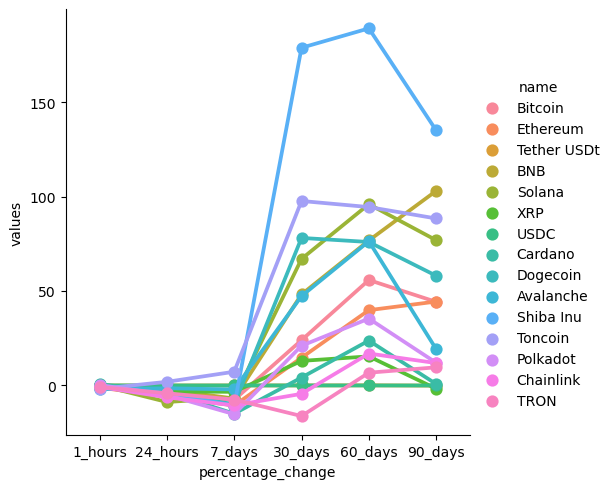

In [59]:
sns.catplot(x='percentage_change', y='values', hue='name', data=df7, kind='point')
plt.show()

In [60]:
df7['percentage_change']= df7['percentage_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1_hours','24_hours','7_days','30_days','60_days','90_days'])
df7

,name,percentage_change,values
0,Bitcoin,1_hours,-0.206639
1,Bitcoin,24_hours,-5.179567
2,Bitcoin,7_days,-7.616973
3,Bitcoin,30_days,23.955104
4,Bitcoin,60_days,55.797017
5,Bitcoin,90_days,44.228456
6,Ethereum,1_hours,-1.124170
7,Ethereum,24_hours,-5.933032
8,Ethereum,7_days,-10.645700
9,Ethereum,30_days,14.687952


In [61]:
df8 = df[['name','quote.USD.price','timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,63096.290340,2024-03-22 15:09:18.203840
0,Bitcoin,63100.853656,2024-03-22 15:10:11.182584
0,Bitcoin,63100.853656,2024-03-22 15:10:41.900395
0,Bitcoin,63292.383657,2024-03-22 15:11:12.215740
0,Bitcoin,63292.383657,2024-03-22 15:11:42.953739


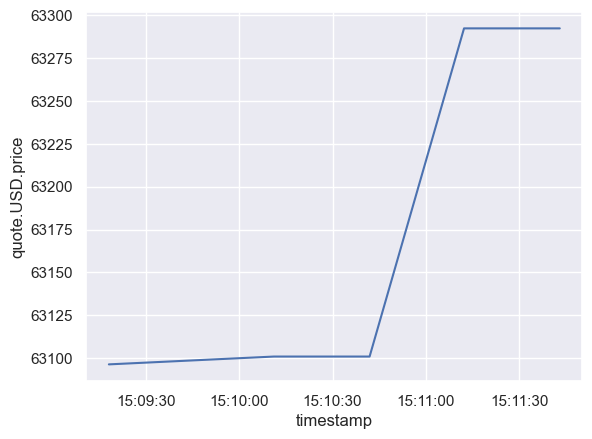

In [66]:
df8.reset_index(drop=True, inplace=True)

# Plot using seaborn
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data=df8)

# Show plot
plt.show()